In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

N=10**4
n=np.random.normal(size=(N,1))
g=np.random.gamma(shape=4,size=(N,1))
x=0.5*n+0.5*g
y=x**2+1+np.random.uniform(-5,5,(N,1))
data=pd.DataFrame(data=np.concatenate([x,y],axis=1),columns=['x','y'])
data.head()

,x,y
0,1.409385,5.341581
1,0.458252,1.839968
2,2.782118,9.538356
3,3.285601,8.974416
4,1.595352,1.667469


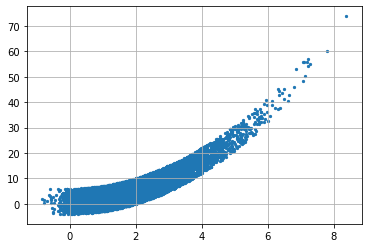

In [3]:
# Relación 'x' vs 'y'
plt.scatter(data['x'],data['y'],s=5)
plt.grid()

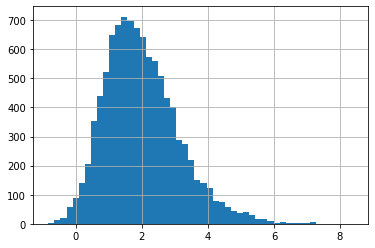

In [4]:
# Histograma
H=data['x'].hist(bins=50)

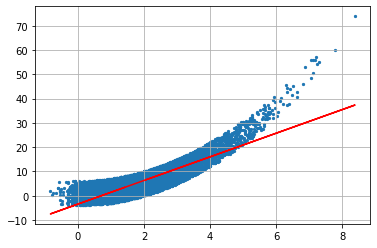

In [5]:
# Regresión de los datos sin discretizar
lin=LinearRegression()
lin.fit(data[['x']],data['y'])

# Gráfica
plt.scatter(data['x'],data['y'],s=5)
plt.plot(data['x'],lin.predict(data[['x']]),'r')
plt.grid()

# Intervalo de ancho constante

In [6]:
# Selección del intervalo
N=50
M=data['x'].max()
m=data['x'].min()
intervalo=(M-m)/N
intervalo

0.18435901598000595

In [7]:
# Determinación de los límites de los contenedores
contenedores=np.arange(m,M+0.1,intervalo)
contenedores.shape

(51,)

In [8]:
m,contenedores.min()

(-0.8339792598756195, -0.8339792598756195)

In [9]:
M,contenedores.max()

(8.383971539124678, 8.383971539124676)

In [10]:
# Discretización
data["x'"]=pd.cut(data['x'],contenedores,include_lowest=True)
data.head()

,x,y,x'
0,1.409385,5.341581,"(1.378, 1.563]"
1,0.458252,1.839968,"(0.457, 0.641]"
2,2.782118,9.538356,"(2.669, 2.853]"
3,3.285601,8.974416,"(3.222, 3.406]"
4,1.595352,1.667469,"(1.563, 1.747]"


In [11]:
data.groupby("x'")['x'].count()

x'
(-0.835, -0.65]        4
(-0.65, -0.465]       12
(-0.465, -0.281]      19
(-0.281, -0.0965]     58
(-0.0965, 0.0878]     89
(0.0878, 0.272]      139
(0.272, 0.457]       206
(0.457, 0.641]       354
(0.641, 0.825]       441
(0.825, 1.01]        522
(1.01, 1.194]        649
(1.194, 1.378]       683
(1.378, 1.563]       712
(1.563, 1.747]       696
(1.747, 1.931]       672
(1.931, 2.116]       643
(2.116, 2.3]         574
(2.3, 2.484]         559
(2.484, 2.669]       507
(2.669, 2.853]       432
(2.853, 3.038]       401
(3.038, 3.222]       288
(3.222, 3.406]       275
(3.406, 3.591]       221
(3.591, 3.775]       150
(3.775, 3.959]       141
(3.959, 4.144]       123
(4.144, 4.328]        77
(4.328, 4.512]        75
(4.512, 4.697]        59
(4.697, 4.881]        44
(4.881, 5.066]        37
(5.066, 5.25]         40
(5.25, 5.434]         29
(5.434, 5.619]        15
(5.619, 5.803]        18
(5.803, 5.987]         9
(5.987, 6.172]         4
(6.172, 6.356]         5
(6.356, 6.54]         

In [26]:
# Codificación
xpp=data.groupby("x'")['x'].mean()
xpp.isna().sum()

4

In [22]:
# Imputación de datos faltantes
np.where(xpp.isna())[0]

array([45, 47, 48, 49])

In [ ]:
#xpp[np.where(xpp.isna())[0]]=xpp[np.where(xpp.isna())[0]-1]
# Esta asignación implica ejecutar el código n-1 veces, donde n es el número de datos perdidos consecutivos

In [27]:
for i in np.where(xpp.isna())[0]:
  xpp[i]=xpp[i-1]
xpp.isna().sum()

0

In [28]:
# Relación entre variables discretas
ypp=data.groupby("x'")['y'].mean()
ypp.isna().sum()

4

In [29]:
for i in np.where(ypp.isna())[0]:
  ypp[i]=ypp[i-1]
ypp.isna().sum()

0

In [30]:
# Regresión lineal
df=pd.DataFrame(columns=['x"','y"'])
df['x"']=xpp
df['y"']=ypp
df.head()

,"x""","y"""
x',,
"(-0.835, -0.65]",-0.762262,1.131247
"(-0.65, -0.465]",-0.545705,0.830860
"(-0.465, -0.281]",-0.334122,0.733288
"(-0.281, -0.0965]",-0.173826,0.587733
"(-0.0965, 0.0878]",0.002347,0.881142


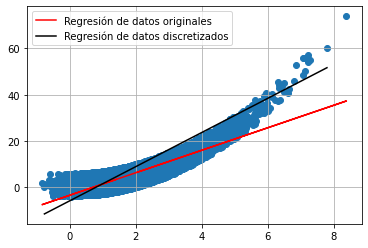

In [32]:
lin1=LinearRegression()
lin1.fit(df[['x"']],df['y"'])

# Grafica
plt.scatter(data['x'],data['y'])
plt.plot(data['x'],lin.predict(data[['x']]),'r',label='Regresión de datos originales')
plt.plot(df['x"'],lin1.predict(df[['x"']]),'k',label='Regresión de datos discretizados')
plt.legend()
plt.grid()

# Intervalos de frecuencia constante

In [35]:
# Determinación del número de elementos
N=50
L=len(data['x'])
L//N

200

In [38]:
# Descretización
data["x'F"],contenedores=pd.qcut(data['x'],N,retbins=True)
data.head()

,x,y,x',x'F
0,1.409385,5.341581,"(1.378, 1.563]","(1.389, 1.436]"
1,0.458252,1.839968,"(0.457, 0.641]","(0.344, 0.505]"
2,2.782118,9.538356,"(2.669, 2.853]","(2.777, 2.868]"
3,3.285601,8.974416,"(3.222, 3.406]","(3.178, 3.315]"
4,1.595352,1.667469,"(1.563, 1.747]","(1.591, 1.651]"


In [39]:
contenedores

array([-0.83397926,  0.11466381,  0.34446494,  0.50485854,  0.61021454,
        0.69322883,  0.77748906,  0.85427191,  0.92977832,  0.99472684,
        1.05945755,  1.11362517,  1.16950809,  1.22498923,  1.28025954,
        1.33012515,  1.38863043,  1.43623298,  1.49170807,  1.54004652,
        1.59120881,  1.65065242,  1.70391571,  1.75060335,  1.80286136,
        1.85828613,  1.91097082,  1.97443437,  2.02360525,  2.08419556,
        2.14569104,  2.21271511,  2.27665413,  2.34293985,  2.41126557,
        2.47406034,  2.55293515,  2.62331101,  2.69493095,  2.77678115,
        2.86842415,  2.95937915,  3.05081336,  3.17778617,  3.31525342,
        3.4691113 ,  3.63794887,  3.90593124,  4.20962843,  4.77520581,
        8.38397154])

In [ ]:
data.groupby("x'F")['x'].count()

In [42]:
# Codificación
xpp=data.groupby("x'F")['x'].mean()
ypp=data.groupby("x'F")['y'].mean()
xpp.isna().sum(),ypp.isna().sum()

(0, 0)

In [43]:
# Regresión lineal
df2=pd.DataFrame(columns=['x"','y"'])
df2['x"']=xpp
df2['y"']=ypp
df2.head()

,"x""","y"""
x'F,,
"(-0.835, 0.115]",-0.120169,0.776348
"(0.115, 0.344]",0.243535,1.250378
"(0.344, 0.505]",0.432207,1.183898
"(0.505, 0.61]",0.559049,1.446910
"(0.61, 0.693]",0.650932,1.308420


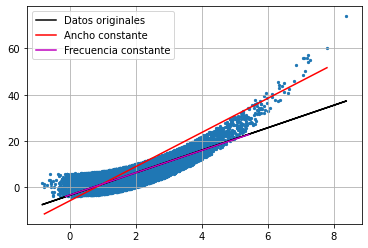

In [47]:
lin2=LinearRegression()
lin2.fit(df2[['x"']],df2['y"'])

# Gráfica
plt.scatter(data['x'],data['y'],s=5)
plt.plot(data['x'],lin.predict(data[['x']]),'k',label='Datos originales')
plt.plot(df['x"'],lin1.predict(df[['x"']]),'r',label='Ancho constante')
plt.plot(df2['x"'],lin2.predict(df2[['x"']]),'m',label='Frecuencia constante')
plt.legend()
plt.grid()

Vemos que en el método de Ancho constante no se modifica la distribución de los datos originales, sin embargo, el peso en cada categoría se ve modificado en el modelo de Regresión lineal. En cambio, para el método de frecuencia constante, la distribución de los datos originales se ve afectada, mientras el peso de cada contenedor se mantiene en relación a la variable original.

# Discretización usando la clase de `SKLearn`.

In [21]:
from sklearn.preprocessing import KBinsDiscretizer

In [49]:
# Intervalos de ancho constante
disc=KBinsDiscretizer(n_bins=N,encode='ordinal',strategy='uniform')
data['xD']=disc.fit_transform(data[['x']])
data['yD']=disc.fit_transform(data[['y']])
data.head()

,x,y,x',x'F,xD,yD
0,1.409385,5.341581,"(1.378, 1.563]","(1.389, 1.436]",12.0,5.0
1,0.458252,1.839968,"(0.457, 0.641]","(0.344, 0.505]",7.0,3.0
2,2.782118,9.538356,"(2.669, 2.853]","(2.777, 2.868]",19.0,8.0
3,3.285601,8.974416,"(3.222, 3.406]","(3.178, 3.315]",22.0,8.0
4,1.595352,1.667469,"(1.563, 1.747]","(1.591, 1.651]",13.0,3.0


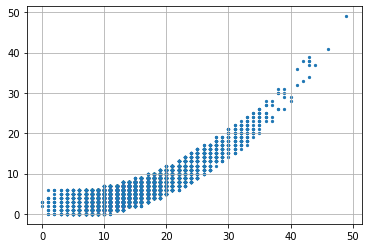

In [50]:
# Gráfica
plt.scatter(data['xD'],data['yD'],s=5)
plt.grid()

In [51]:
# Intervalo de frecuencia constante
disc=KBinsDiscretizer(n_bins=N,encode='ordinal',strategy='quantile')
data['xDf']=disc.fit_transform(data[['x']])
data['yDf']=disc.fit_transform(data[['y']])
data.head()

,x,y,x',x'F,xD,yD,xDf,yDf
0,1.409385,5.341581,"(1.378, 1.563]","(1.389, 1.436]",12.0,5.0,16.0,25.0
1,0.458252,1.839968,"(0.457, 0.641]","(0.344, 0.505]",7.0,3.0,2.0,12.0
2,2.782118,9.538356,"(2.669, 2.853]","(2.777, 2.868]",19.0,8.0,39.0,38.0
3,3.285601,8.974416,"(3.222, 3.406]","(3.178, 3.315]",22.0,8.0,43.0,37.0
4,1.595352,1.667469,"(1.563, 1.747]","(1.591, 1.651]",13.0,3.0,20.0,11.0


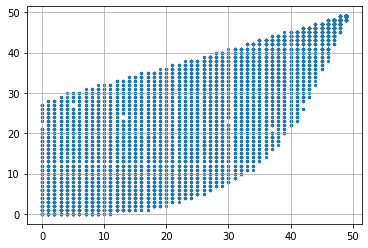

In [52]:
# Gráfica
plt.scatter(data['xDf'],data['yDf'],s=5)
plt.grid()

In [53]:
# Detección de los límites de los contenedores
disc.bin_edges_

array([array([-3.98923016, -2.5257054 , -1.83182925, -1.35664616, -0.92260945,
              -0.50430253, -0.10480141,  0.2965425 ,  0.60393197,  0.94862743,
               1.29473842,  1.57934511,  1.83749666,  2.1322601 ,  2.39306793,
               2.70172922,  2.97051371,  3.25685804,  3.51508475,  3.74385144,
               3.99117087,  4.28053468,  4.53095135,  4.77662049,  5.00481062,
               5.26751926,  5.49869837,  5.73633926,  5.966794  ,  6.20764457,
               6.42668978,  6.69584106,  6.96216933,  7.28509857,  7.60414818,
               7.94565746,  8.30649969,  8.67535075,  9.0887467 ,  9.5532671 ,
              10.07737366, 10.65886986, 11.3059423 , 11.99828548, 12.85281256,
              13.90065543, 15.21599003, 16.91626314, 19.69550588, 24.08207383,
              73.87606191])                                                   ],
      dtype=object)